## Importing Some important packages

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import seaborn as sns

c:\python 3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Loading Datas

In [2]:

data_bus = pd.read_csv("train_revised.csv")
data_bus.head()

df_test_set = pd.read_csv('test_questions.csv', low_memory=False)

In [3]:
# Keeping only column that are usefull for our study 
data_revised = data_bus.drop(['seat_number', 'payment_method', 'payment_receipt'],axis=1)

data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
# Extra town From Training set: Sori, Keumbu and Oyugis

In [5]:
# Keumbu, Oyugis, 

In [6]:
# This hlep to count the number 
# of ticket sold for a specific ride_id

ride_id_count = {} 
for ride_id in data_revised["ride_id"]:
    if not ride_id in ride_id_count:
        ride_id_count[ride_id] = 1
    else:
        ride_id_count[ride_id] += 1 
        
data_revised.drop_duplicates(inplace=True)
data_revised.reset_index(drop= True, inplace=True)

# Initialise our column with zero
data_revised["number_of_tickets"]= np.zeros(
    len(data_revised),dtype=int)

# we update the number of ticket as follow 
for i in range(len(data_revised)):
    ride_id = data_revised.loc[i]["ride_id"]
    data_revised.at[
        i,"number_of_tickets"] = ride_id_count[ride_id]

In [7]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31


## Adding some useful column

In [8]:
data_revised["Hour"]= data_revised["travel_time"].str.split(':').apply(lambda x: int(x[0]))
data_revised["Minute"]= data_revised["travel_time"].str.split(':').apply(lambda x: int(x[1]))

# data_revised data_revised["Day_week"].dt.strftime('%w')
data_revised['travel_date'] = pd.to_datetime(data_revised['travel_date'])

data_revised['Day_week'] = data_revised['travel_date'].dt.strftime('%w')
# changing to numeric
data_revised['Day_week']=pd.to_numeric(data_revised['Day_week'])

data_revised['year_Month'] = data_revised['travel_date'].dt.strftime('%Y-%m')

data_revised["Day"]= data_revised['travel_date'].dt.strftime('%d')
data_revised["Month"]= data_revised['travel_date'].dt.strftime('%m')
data_revised["year"]= data_revised['travel_date'].dt.strftime('%Y')


In [9]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,Hour,Minute,Day_week,year_Month,Day,Month,year
0,1442,2017-10-17,7:15,Migori,Nairobi,Bus,49,1,7,15,2,2017-10,17,10,2017
1,5437,2017-11-19,7:12,Migori,Nairobi,Bus,49,1,7,12,0,2017-11,19,11,2017
2,5710,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1,7,5,0,2017-11,26,11,2017
3,5777,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5,7,10,1,2017-11,27,11,2017
4,5778,2017-11-27,7:12,Migori,Nairobi,Bus,49,31,7,12,1,2017-11,27,11,2017


## Datas Visualisation

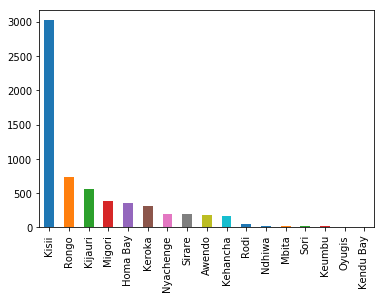

In [10]:
data_revised['travel_from'].value_counts().plot.bar()

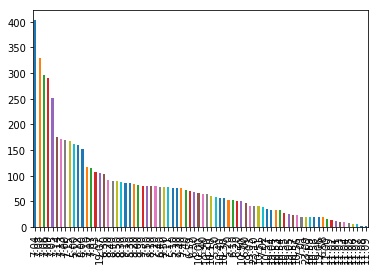

In [11]:
# Here we are looking at how the plot of traveling time behave
data_revised['travel_time'].value_counts().plot.bar()

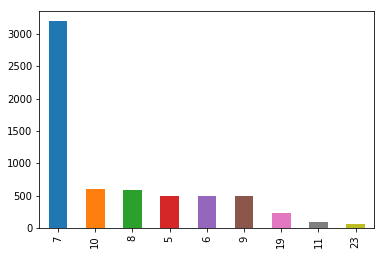

In [12]:
data_revised['Hour'].value_counts().plot.bar()

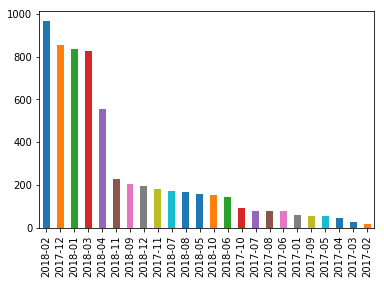

In [13]:
data_revised['year_Month'].value_counts().plot.bar()

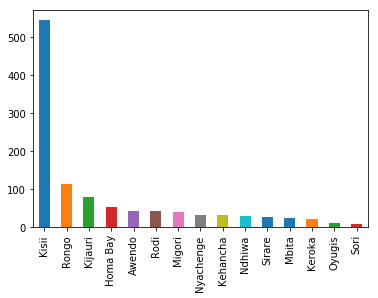

In [14]:
# This is for the competition purpose
# This is the cities that are concerned in the test set 
df_test_set.travel_from.value_counts().plot.bar()

As Keumbu is not part of our study and is not in the testing sample provided by zindi, we decided to look at it as noice in the data and removed it.

In [15]:
# Removing occurance of Keumbu
data_revised.drop(data_revised[data_revised['travel_from']=='Keumbu'].index, inplace=True)

# Removing occurance of Kendu bay not in the test set
data_revised.drop(data_revised[data_revised['travel_from']=='Kendu Bay'].index, inplace=True)


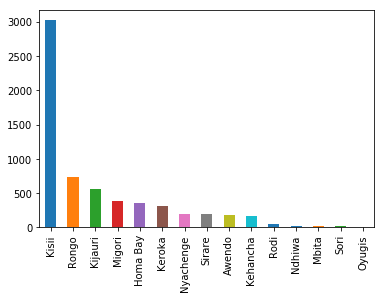

In [16]:
data_revised['travel_from'].value_counts().plot.bar()

In [17]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,Hour,Minute,Day_week,year_Month,Day,Month,year
0,1442,2017-10-17,7:15,Migori,Nairobi,Bus,49,1,7,15,2,2017-10,17,10,2017
1,5437,2017-11-19,7:12,Migori,Nairobi,Bus,49,1,7,12,0,2017-11,19,11,2017
2,5710,2017-11-26,7:05,Keroka,Nairobi,Bus,49,1,7,5,0,2017-11,26,11,2017
3,5777,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,5,7,10,1,2017-11,27,11,2017
4,5778,2017-11-27,7:12,Migori,Nairobi,Bus,49,31,7,12,1,2017-11,27,11,2017


We are doing some feature engeneering that will increase the accuracy of our predictor.

In [18]:
def classOur(x) :
    if (int(x[0])==7):
        return 1
    return 2
# Creating a new column to group time
data_revised["Time_classify"] = data_revised["travel_time"].str.split(':').apply(classOur)

def classProv(x) :
    if (x[0]=='Kisii'):
        return 1
    return 2

# Creating a new column to group the orgin
data_revised["Class_Prov"] = data_revised["travel_from"].str.split(':').apply(classProv)


def classdate(x) :
#     if (x[0]=='2018/01' or x[0]=='2018/02' or x[0]=='2018/03' or x[0]=='2018/04' or x[0]=='2017/12'):
    if (((x[0]=='2017') and (x[1]=='12')) or 
       ((x[0]=='2018') and (x[1]=='01')) or
       ((x[0]=='2018') and (x[1]=='02')) or
       ((x[0]=='2018') and (x[1]=='03')) or
       ((x[0]=='2018') and (x[1]=='04'))):
        return 1
    return 2

data_revised["Class_Data"] = data_revised["year_Month"].str.split('-').apply(classdate)

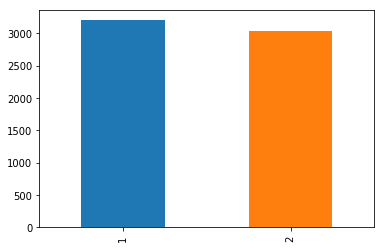

In [19]:
data_revised.Time_classify.value_counts().plot.bar()

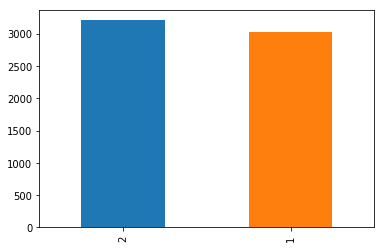

In [20]:
data_revised.Class_Prov.value_counts().plot.bar()

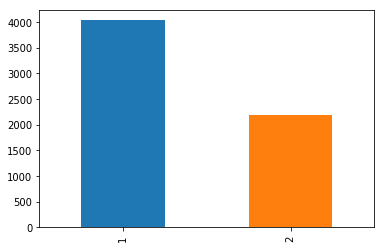

In [21]:
data_revised.Class_Data.value_counts().plot.bar()

As Random Forest require the input features to have numerical values, we will have to change our categorical variable, in such a way that they can be viewed by our model as numerical values.

In [22]:
data_revised["travel_date"] = pd.to_datetime(data_revised["travel_date"],infer_datetime_format=True)
data_revised["travel_date"] = data_revised["travel_date"].dt.dayofweek #change the full date to day of week

data_revised["car_type"] = pd.Categorical(data_revised["car_type"])
# car_type_categories = data_revised.car_type.cat.categories
data_revised["car_type"] = data_revised.car_type.cat.codes

data_revised["travel_from"] = pd.Categorical(data_revised["travel_from"])
# travel_from_categories = data_revised.travel_from.cat.categories
data_revised["travel_from"] = data_revised.travel_from.cat.codes

data_revised["travel_to"] = pd.Categorical(data_revised["travel_to"])
data_revised["travel_to"] = data_revised.travel_to.cat.codes

data_revised["travel_time"] = data_revised["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

# data_revised["travel_time"] = data_revised["travel_time"].str.split(':').apply(lambda x: int(x[0]))

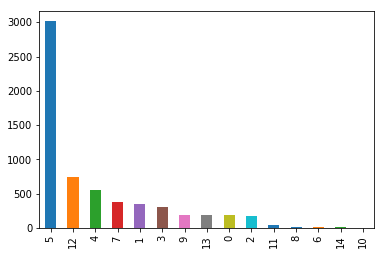

In [23]:
data_revised['travel_from'].value_counts().plot.bar()

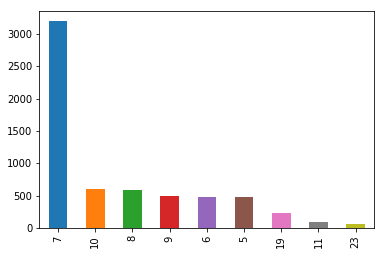

In [24]:
data_revised['Hour'].value_counts().plot.bar()

In [25]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,Hour,Minute,Day_week,year_Month,Day,Month,year,Time_classify,Class_Prov,Class_Data
0,1442,1,435,7,0,0,49,1,7,15,2,2017-10,17,10,2017,1,2,2
1,5437,6,432,7,0,0,49,1,7,12,0,2017-11,19,11,2017,1,2,2
2,5710,6,425,3,0,0,49,1,7,5,0,2017-11,26,11,2017,1,2,2
3,5777,0,430,1,0,0,49,5,7,10,1,2017-11,27,11,2017,1,2,2
4,5778,0,432,7,0,0,49,31,7,12,1,2017-11,27,11,2017,1,2,2


# Model

In [26]:
data_revised.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickets,Hour,Minute,Day_week,year_Month,Day,Month,year,Time_classify,Class_Prov,Class_Data
0,1442,1,435,7,0,0,49,1,7,15,2,2017-10,17,10,2017,1,2,2
1,5437,6,432,7,0,0,49,1,7,12,0,2017-11,19,11,2017,1,2,2
2,5710,6,425,3,0,0,49,1,7,5,0,2017-11,26,11,2017,1,2,2
3,5777,0,430,1,0,0,49,5,7,10,1,2017-11,27,11,2017,1,2,2
4,5778,0,432,7,0,0,49,31,7,12,1,2017-11,27,11,2017,1,2,2


In [76]:
from sklearn.model_selection import train_test_split

# We put features that will help us predict number of ticket together in X
# X = data_revised[["travel_date", "travel_time", "travel_from", "car_type", "max_capacity"]]
X = data_revised[["Day_week",  "Time_classify", "Day", "travel_to", "travel_time", "travel_from", "car_type", "max_capacity"]]

# For competition
# X_comp = data_revised[["Day_week", "Class_Data", "Time_classify", "travel_time", "travel_from", "car_type", "max_capacity"]]


# Our target variable is the number of ticket 
y = data_revised.number_of_tickets

# 20% testing and 80% Training 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (4982, 8) (4982,)
Test set: (1246, 8) (1246,)


In [77]:
X.head()

,Day_week,Time_classify,Day,travel_to,travel_time,travel_from,car_type,max_capacity
0,2,1,17,0,435,7,0,49
1,0,1,19,0,432,7,0,49
2,0,1,26,0,425,3,0,49
3,1,1,27,0,430,1,0,49
4,1,1,27,0,432,7,0,49


In [78]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 6248
Data columns (total 8 columns):
Day_week         6228 non-null int64
Time_classify    6228 non-null int64
Day              6228 non-null object
travel_to        6228 non-null int8
travel_time      6228 non-null int64
travel_from      6228 non-null int8
car_type         6228 non-null int8
max_capacity     6228 non-null int64
dtypes: int64(4), int8(3), object(1)
memory usage: 310.2+ KB


## Random Forest

### Spleet version

In [132]:
model = RandomForestRegressor(n_estimators=100, criterion="mae", n_jobs=-1)

In [133]:
model.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [134]:
y_preds = model.predict(X_test)

In [135]:
# As the number of tickets is an integer value, we decided to change 
# The output to int.
y_preds = np.rint(y_preds)

#### Error Checking

In [136]:
print (mean_absolute_error(y_preds,y_test))

3.6581059390048156


# Other Regressor Method

## Linear Regression

In [29]:
from sklearn import linear_model

In [30]:
# Create linear regression object
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
linear.score(X_train, y_train)
#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
#Predict Output
predicted= linear.predict(X_test)

Coefficient: 
 [-0.07411651  0.01039034 -0.24487079 -0.0027544   0.10466724]
Intercept: 
 1.5416459240408447


In [31]:
print (mean_absolute_error(predicted,y_test))

6.07526569013974


Not good at all.

## KNeighborsRegressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [86]:
neigh = KNeighborsRegressor()
neigh.fit(X_train, y_train) 

y_preds3 = neigh.predict(X_test)

In [87]:
print (mean_absolute_error(y_preds3,y_test))

4.257463884430177


## CatBoostRegressor

In [90]:
X.head()

,Day_week,Time_classify,Day,travel_to,travel_time,travel_from,car_type,max_capacity
0,2,1,17,0,435,7,0,49
1,0,1,19,0,432,7,0,49
2,0,1,26,0,425,3,0,49
3,1,1,27,0,430,1,0,49
4,1,1,27,0,432,7,0,49


In [137]:
from catboost import CatBoostRegressor

model_cat = CatBoostRegressor()



In [142]:
# Specify cathegorical variable 
cat_features = [0, 1, 2, 3, 4, 5, 6, 7] 
model_cat.fit(X_train, y_train, cat_features)

In [139]:
preds = model_cat.predict(X_test)

preds = np.rint(preds)

### This is our Smallest Error

In [141]:
print (mean_absolute_error(preds,y_test))

3.570626003210273


## XGBoost

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 6248
Data columns (total 5 columns):
travel_date     6228 non-null int64
travel_time     6228 non-null int64
travel_from     6228 non-null int8
car_type        6228 non-null int8
max_capacity    6228 non-null int64
dtypes: int64(3), int8(2)
memory usage: 206.8 KB


In [92]:
xgb_model = xgb.XGBRegressor()

xgb_model.fit(X_train, y_train)
# xgb_model.fit(X, y)


y_pred_xgb = xgb_model.predict(X_test)

In [93]:
print (mean_absolute_error(y_pred_xgb,y_test))

3.982234814193811


### All dataset (For the cometition purpose)

In [227]:
# model_all = RandomForestRegressor(n_estimators=100, criterion="mae", n_jobs=-1)
model_all = RandomForestRegressor(n_estimators=100, criterion='mae', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                  random_state=None, verbose=0, warm_start=False)

In [228]:
model_all.fit(X_comp,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [229]:
y_preds_all = model_all.predict(X)

In [230]:
y_preds_all = np.rint(y_preds_all)

In [231]:
X.head()

,Day_week,Class_Data,Time_classify,travel_time,travel_from,car_type,max_capacity
0,2,2,1,435,7,0,49
1,0,2,1,432,7,0,49
2,0,2,1,425,3,0,49
3,1,2,1,430,1,0,49
4,1,2,1,432,7,0,49


#### Error Checking

In [232]:
print (mean_absolute_error(y_preds_all,y))

2.9373795761079


Using rint()
with id : 1.1870699311889903
with id and travel_to : 1.172827652424388


In [938]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 5 columns):
Day_week        6249 non-null int64
travel_time     6249 non-null int64
travel_from     6249 non-null int8
car_type        6249 non-null int8
max_capacity    6249 non-null int64
dtypes: int64(3), int8(2)
memory usage: 158.7 KB


# Testing 

In [97]:
df_test_set = pd.read_csv('test_questions.csv', low_memory=False)

In [98]:
df_test_set.max_capacity.value_counts()

49    599
11    512
Name: max_capacity, dtype: int64

In [99]:
df_test_set.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [100]:
df_test_set["Hour"]= df_test_set["travel_time"].str.split(':').apply(lambda x: int(x[0]))
df_test_set["Minute"]= df_test_set["travel_time"].str.split(':').apply(lambda x: int(x[1]))

df_test_set['travel_date'] = pd.to_datetime(df_test_set['travel_date'])
df_test_set['Day_week'] = df_test_set['travel_date'].dt.strftime('%w')
df_test_set['Day_week'] = pd.to_numeric(df_test_set['Day_week'])

df_test_set['year_Month'] = df_test_set['travel_date'].dt.strftime('%Y-%m')

df_test_set["Day"]= df_test_set['travel_date'].dt.strftime('%d')
df_test_set["Month"]= df_test_set['travel_date'].dt.strftime('%m')
df_test_set["year"]= df_test_set['travel_date'].dt.strftime('%Y')

# def classOur(x) :
#     if (int(x[0])==7):
#         return 0
#     if (int(x[0])>19):
#         return 1
#     return 2

def classOur(x) :
    if (int(x[0])==7):
        return 1
    return 2

df_test_set["Time_classify"] = df_test_set["travel_time"].str.split(':').apply(classOur)

def classProv(x) :
    if (x[0]=='Kisii'):
        return 1
    return 2
df_test_set["Class_Prov"] = df_test_set["travel_from"].str.split(':').apply(classProv)



In [101]:
def classdate(x) :
#     if (x[0]=='2018/01' or x[0]=='2018/02' or x[0]=='2018/03' or x[0]=='2018/04' or x[0]=='2017/12'):
    if (((x[0]=='2017') and (x[1]=='12')) or 
       ((x[0]=='2018') and (x[1]=='01')) or
       ((x[0]=='2018') and (x[1]=='02')) or
       ((x[0]=='2018') and (x[1]=='03')) or
       ((x[0]=='2018') and (x[1]=='04'))):
        return 1
    return 2
df_test_set["Class_Data"] = df_test_set["year_Month"].str.split('-').apply(classdate)


In [102]:
# df_test_set["travel_date"] = pd.to_datetime(df_test_set["travel_date"],infer_datetime_format=True)
# df_test_set["travel_date"] = df_test_set["travel_date"].dt.dayofweek #change the full date to day of week

df_test_set["car_type"] = pd.Categorical(df_test_set["car_type"])
# car_type_categories = data_revised.car_type.cat.categories
df_test_set["car_type"] = df_test_set.car_type.cat.codes

df_test_set["travel_from"] = pd.Categorical(df_test_set["travel_from"])
# travel_from_categories = data_revised.travel_from.cat.categories
df_test_set["travel_from"] = df_test_set.travel_from.cat.codes

df_test_set["travel_to"] = pd.Categorical(df_test_set["travel_to"])
df_test_set["travel_to"] = df_test_set.travel_to.cat.codes

df_test_set["travel_time"] = df_test_set["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

# df_test_set["travel_time"] = df_test_set["travel_time"].str.split(':').apply(lambda x: int(x[0]))

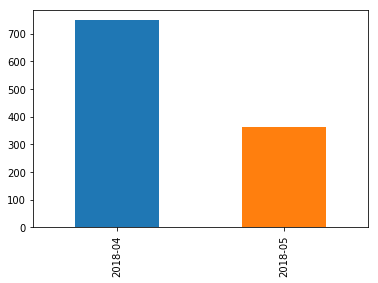

In [103]:
df_test_set.year_Month.value_counts().plot.bar()

In [104]:
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 17 columns):
ride_id          1111 non-null int64
travel_date      1111 non-null datetime64[ns]
travel_time      1111 non-null int64
travel_from      1111 non-null int8
travel_to        1111 non-null int8
car_type         1111 non-null int8
max_capacity     1111 non-null int64
Hour             1111 non-null int64
Minute           1111 non-null int64
Day_week         1111 non-null int64
year_Month       1111 non-null object
Day              1111 non-null object
Month            1111 non-null object
year             1111 non-null object
Time_classify    1111 non-null int64
Class_Prov       1111 non-null int64
Class_Data       1111 non-null int64
dtypes: datetime64[ns](1), int64(9), int8(3), object(4)
memory usage: 124.8+ KB


In [105]:
X_ = df_test_set[["Day_week",  "Time_classify", "Day", "travel_to", "travel_time", "travel_from", "car_type", "max_capacity"]]
# X_ = df_test_set[["Month", "travel_time", "travel_from", "car_type", "max_capacity"]]

X_.head()                    

,Day_week,Time_classify,Day,travel_to,travel_time,travel_from,car_type,max_capacity
0,1,1,07,0,426,5,0,49
1,0,2,06,0,668,5,1,11
2,5,2,04,0,300,5,1,11
3,5,2,04,0,550,5,1,11
4,5,2,04,0,560,5,1,11


In [106]:
X_.head()                    

,Day_week,Time_classify,Day,travel_to,travel_time,travel_from,car_type,max_capacity
0,1,1,07,0,426,5,0,49
1,0,2,06,0,668,5,1,11
2,5,2,04,0,300,5,1,11
3,5,2,04,0,550,5,1,11
4,5,2,04,0,560,5,1,11


In [107]:
# from sklearn import preprocessing
# X_ = preprocessing.StandardScaler().fit(X).transform(X)

In [121]:
# test_set_predictions = model.predict(X_)
test_set_predictions = model_cat.predict(X_)

In [122]:
test_set_predictions = np.rint(test_set_predictions)

In [123]:
# test_set_predictions[:10]

In [124]:
d = {'ride_id': df_test_set["ride_id"], 'number_of_ticket': test_set_predictions}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions[['ride_id','number_of_ticket']]

df_predictions.head()

,ride_id,number_of_ticket
0,247,6.0
1,256,3.0
2,275,0.0
3,285,4.0
4,286,4.0


Saving our file

In [125]:
df_predictions.to_csv('predi.csv', index=False) #save to csv file

### This is just for fun, supposing that the first five rowns in the sample submission are true

In [409]:
df_test = pd.read_csv('sample_submission.csv', low_memory=False)
df_test.head()

,ride_id,number_of_ticket
0,247,4.0
1,256,2.0
2,275,5.0
3,285,7.0
4,286,9.0


In [410]:
y_test_ = df_test.number_of_ticket

In [871]:
print (mean_absolute_error(test_set_predictions[:5],y_test_[:5]))

3.4
